In [1]:
#data proccesing and cleaning 
import numpy as np
import pandas as pd 
#data visulization  
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 

#ml model 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB




## let's explore out data 

In [2]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Rintamaki, Mr. Matti",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


## we must handle missing value <br>


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### precent% of missing data per columns 

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
per_1 = train_df.isnull().sum() / train_df.isnull().count() *100
per_2 = (round(per_1,1)).sort_values(ascending=False)
missing = pd.concat([total,per_2],axis=1,keys=['total','%'])
missing.head()

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [9]:
all_count = train_df.isnull().count() #isnull to also conclude Nan values


**Age can be handeled but cabin needs further understanding**

In [10]:
train_df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**ithink passengerId ,name will not be helpful as feature**

In [11]:
men = train_df[train_df['Sex']=='male']
men

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
women = train_df[train_df['Sex'] == 'female'].Age.dropna() #Return a new Series with missing values removed
women # use ctrl+i for docs 

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
879    56.0
880    25.0
882    22.0
885    39.0
887    19.0
Name: Age, Length: 261, dtype: float64

Text(0.5,1,'Male')

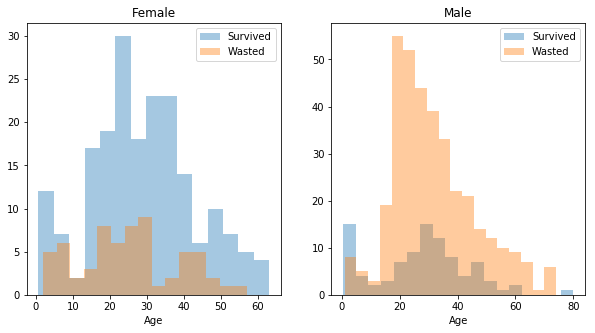

In [13]:
survived = 'Survived' #have value 1
wasted = 'Wasted' # have value 0
fig,axes =plt.subplots(nrows=1,ncols=2,figsize=(10,5))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(),bins=15,label=survived,kde=False,ax=axes[0])
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(),bins=15,label=wasted,kde=False,ax=axes[0])
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(),bins=18,label=survived,kde=False,ax=axes[1])
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(),bins=18,label=wasted,kde=False,ax=axes[1])
ax.legend()
ax.set_title('Male')

## Bam!! looks like the female youth are the luckist here 

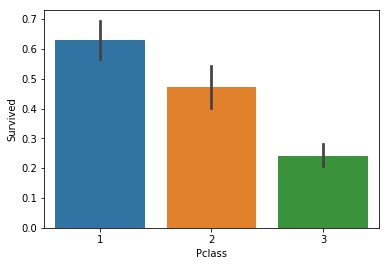

In [14]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

**people in the first class seems to survive more that's anew info for me thx alot sns**

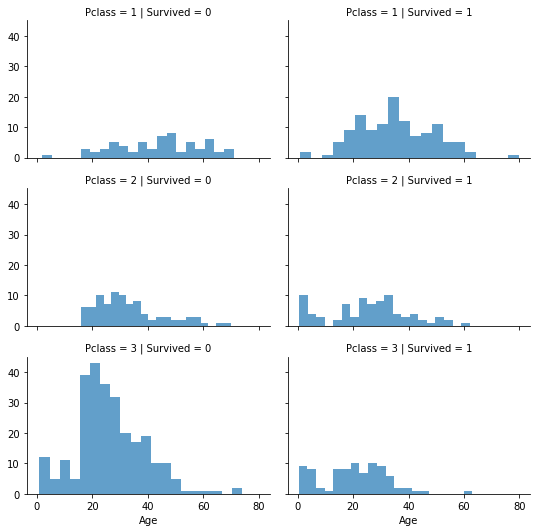

In [15]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Survived',height=2.5,aspect=1.5)
grid.map(plt.hist,'Age',alpha=.7,bins=20)
grid.add_legend()

**this assures that a young person of class=1 will survive the most** 

## sibsp & parch 're all the relatives  've on board let's combine them and see if a family survive together or not


In [16]:
data = [train_df,test_df]
for d in data :
    d['relatives'] = d['SibSp'] + d['Parch']
    d.loc[d['relatives']>0, 'not_alone'] = 0
    d.loc[d['relatives']==0,'not_alone'] = 1
    d['not_alone'] = d['not_alone'].astype(int)

    

In [17]:
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

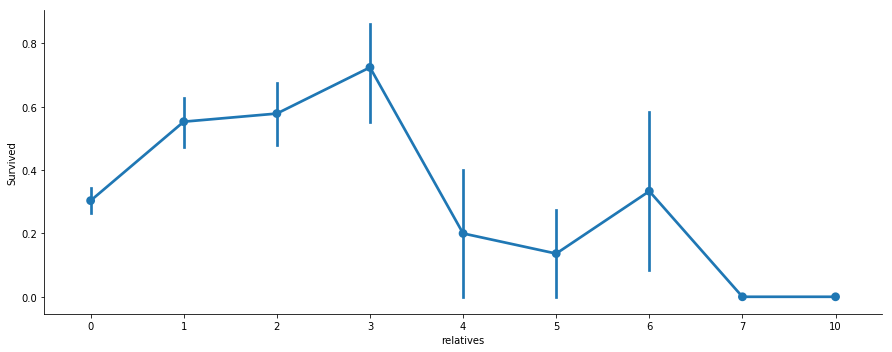

In [18]:
axes = sns.catplot(x='relatives',y='Survived',data=train_df,aspect=2.5,kind='point')


**abig family burdens you! have 1 kid only bro ^_^**

# Data processing

In [19]:
#drop passengerId
train_df = train_df.drop(['PassengerId'],axis=1)

In [20]:
train_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

**cabin 1st letter coresponds to adick floor number** 

In [21]:
train_df['Cabin'].fillna('U0')

0        U0
1       C85
2        U0
3      C123
4        U0
       ... 
886      U0
887     B42
888      U0
889    C148
890      U0
Name: Cabin, Length: 891, dtype: object

In [22]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

### Age
**let's replace Nan values with random values across the mean and( + or -) std**

In [23]:
data=[train_df,test_df]
for dataset in data :
    mean = dataset['Age'].mean()
    std = dataset["Age"].std()
    is_null = dataset['Age'].isnull().sum()
# compute random numbers between the mean, std and is_null
    range_num = np.random.randint(mean-std,mean+std,size=is_null)
# fill NaN values in Age column with random values generated
    age = dataset["Age"].copy()
    age[np.isnan(age)]=range_num
    dataset['Age']=age
    dataset["Age"] = dataset["Age"].astype(int)
    

In [24]:
train_df.Age.isnull().sum()

0

### Emparked 

In [25]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [26]:
train_df.Embarked.isnull().sum()

2

In [27]:
#let's replace Nan
common_value = 'S'
data=[train_df,test_df]
for dataset in data :
    dataset['Embarked'].fillna(common_value)

# convert features into numerical categories 


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Cabin        891 non-null object
Embarked     889 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 97.6+ KB


In [29]:
#converting fare type into int
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
train_df[train_df['Fare']==0].count()

Survived     15
Pclass       15
Name         15
Sex          15
Age          15
SibSp        15
Parch        15
Ticket       15
Fare         15
Cabin        15
Embarked     15
relatives    15
not_alone    15
Deck         15
dtype: int64

## Name

In [31]:
train_df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [32]:
#Name we need it as aGender 
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [33]:
#drop Name
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [34]:
train_df.Title

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

## convert Sex into numeric 

In [35]:
data = [train_df,test_df]
Genders = {'male':1,'female':0}
for dataset in data :
    dataset['Sex'] = dataset['Sex'].map(Genders)

In [36]:
train_df.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

## Tickets

In [37]:
train_df.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [38]:
#let's drop ticket columns many unique values
train_df.drop(['Ticket'],axis=1)

test_df.drop(['Ticket'],axis=1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Deck,Title
0,892,3,1,34,0,0,7,U0,Q,0,1,8,1
1,893,3,0,47,1,0,7,U0,S,1,0,8,3
2,894,2,1,62,0,0,9,U0,Q,0,1,8,1
3,895,3,1,27,0,0,8,U0,S,0,1,8,1
4,896,3,0,22,1,1,12,U0,S,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,37,0,0,8,U0,S,0,1,8,1
414,1306,1,0,39,0,0,108,C105,C,0,1,3,5
415,1307,3,1,38,0,0,7,U0,S,0,1,8,1
416,1308,3,1,24,0,0,8,U0,S,0,1,8,1


In [39]:
train_df.drop(['Cabin'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,0,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,0,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,0,35,1,0,113803,53,S,1,0,3,3
4,0,3,1,35,0,0,373450,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,211536,13,S,0,1,8,5
887,1,1,0,19,0,0,112053,30,S,0,1,2,2
888,0,3,0,25,1,2,W./C. 6607,23,S,3,0,8,2
889,1,1,1,26,0,0,111369,30,C,0,1,3,1


In [40]:
train_df = train_df.drop(['Cabin'],axis=1)
test_df = test_df.drop(['Cabin'],axis=1)

In [41]:
train_df = train_df.drop(['Ticket'],axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [42]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,22,1,0,7,S,1,0,8,1
1,1,1,0,38,1,0,71,C,1,0,3,3
2,1,3,0,26,0,0,7,S,0,1,8,2
3,1,1,0,35,1,0,53,S,1,0,3,3
4,0,3,1,35,0,0,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,S,0,1,8,5
887,1,1,0,19,0,0,30,S,0,1,2,2
888,0,3,0,25,1,2,23,S,3,0,8,2
889,1,1,1,26,0,0,30,C,0,1,3,1


## convert Embarked feature into numeric


In [43]:
pla = pd.read_csv('./titanic/train.csv')
pla2 = pd.read_csv('./titanic/test.csv')
train_df['Embarked'] = pla['Embarked']
test_df['Embarked'] = pla2['Embarked']


In [44]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,22,1,0,7,S,1,0,8,1
1,1,1,0,38,1,0,71,C,1,0,3,3
2,1,3,0,26,0,0,7,S,0,1,8,2
3,1,1,0,35,1,0,53,S,1,0,3,3
4,0,3,1,35,0,0,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,S,0,1,8,5
887,1,1,0,19,0,0,30,S,0,1,2,2
888,0,3,0,25,1,2,23,S,3,0,8,2
889,1,1,1,26,0,0,30,C,0,1,3,1


In [45]:
train_df.Embarked=train_df.Embarked.fillna('S')

In [46]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    

In [47]:
train_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
relatives    0
not_alone    0
Deck         0
Title        0
dtype: int64

In [48]:
train_df.Embarked

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [49]:
train_df.Embarked.isnull().sum()

0

In [50]:
train_df.Embarked[:20]

0     0
1     1
2     0
3     0
4     0
5     2
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    2
17    0
18    0
19    1
Name: Embarked, dtype: int64

## Creating Categories:

We will now create categories within the following features:

### Age:
Now we need to convert the 'age' feature. First we will convert it from float into integer. Then we will create the new 'AgeGroup" variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don't want for example that 80% of your data falls into group 1.

In [51]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,22,1,0,7,0,1,0,8,1
1,1,1,0,38,1,0,71,1,1,0,3,3
2,1,3,0,26,0,0,7,0,0,1,8,2
3,1,1,0,35,1,0,53,0,1,0,3,3
4,0,3,1,35,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,0,0,1,8,5
887,1,1,0,19,0,0,30,0,0,1,2,2
888,0,3,0,25,1,2,23,0,3,0,8,2
889,1,1,1,26,0,0,30,1,0,1,3,1


In [52]:
pla['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [53]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 66

In [54]:
# let's see how it's distributed
train_df['Age'].value_counts()

6     160
4     155
5     154
3     137
2     118
1      92
0      68
66      7
Name: Age, dtype: int64

In [55]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,2,1,0,7,0,1,0,8,1
1,1,1,0,5,1,0,71,1,1,0,3,3
2,1,3,0,3,0,0,7,0,0,1,8,2
3,1,1,0,5,1,0,53,0,1,0,3,3
4,0,3,1,5,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,13,0,0,1,8,5
887,1,1,0,2,0,0,30,0,0,1,2,2
888,0,3,0,3,1,2,23,0,3,0,8,2
889,1,1,1,3,0,0,30,1,0,1,3,1


## ymm!! we still only have Faire to categorize


In [56]:
train_df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [57]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [58]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,2,1,0,0,0,1,0,8,1
1,1,1,0,5,1,0,3,1,1,0,3,3
2,1,3,0,3,0,0,0,0,0,1,8,2
3,1,1,0,5,1,0,3,0,1,0,3,3
4,0,3,1,5,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,1,0,0,1,8,5
887,1,1,0,2,0,0,2,0,0,1,2,2
888,0,3,0,3,1,2,2,0,3,0,8,2
889,1,1,1,3,0,0,2,1,0,1,3,1


**iam ok with these features**

## let's play with ML models ,we are doin' magic here ^_^

In [59]:
#how test.csv are doin here
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,892,3,1,5,0,0,0,2,0,1,8,1
1,893,3,0,6,1,0,0,0,1,0,8,3
2,894,2,1,6,0,0,1,2,0,1,8,1
3,895,3,1,3,0,0,1,0,0,1,8,1
4,896,3,0,2,1,1,1,0,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,5,0,0,1,0,0,1,8,1
414,1306,1,0,5,0,0,4,1,0,1,3,5
415,1307,3,1,5,0,0,0,0,0,1,8,1
416,1308,3,1,3,0,0,1,0,0,1,8,1


### #cabin needs to be dropped coz we replace it with deck

In [60]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,892,3,1,5,0,0,0,2,0,1,8,1
1,893,3,0,6,1,0,0,0,1,0,8,3
2,894,2,1,6,0,0,1,2,0,1,8,1
3,895,3,1,3,0,0,1,0,0,1,8,1
4,896,3,0,2,1,1,1,0,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,5,0,0,1,0,0,1,8,1
414,1306,1,0,5,0,0,4,1,0,1,3,5
415,1307,3,1,5,0,0,0,0,0,1,8,1
416,1308,3,1,3,0,0,1,0,0,1,8,1


# Building ML Models

In [61]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,2,1,0,0,0,1,0,8,1
1,1,1,0,5,1,0,3,1,1,0,3,3
2,1,3,0,3,0,0,0,0,0,1,8,2
3,1,1,0,5,1,0,3,0,1,0,3,3
4,0,3,1,5,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,1,0,0,1,8,5
887,1,1,0,2,0,0,2,0,0,1,2,2
888,0,3,0,3,1,2,2,0,3,0,8,2
889,1,1,1,3,0,0,2,1,0,1,3,1


In [62]:
x_train = train_df.drop('Survived',axis=1)
y_train = train_df['Survived']
x_test = test_df.drop('PassengerId',axis=1).copy()

In [63]:
#sgd algorithm 
sgd = linear_model.SGDClassifier(max_iter=5,tol=None)
sgd.fit(x_train,y_train)
predictions = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train,y_train)*100,2) #the score between x and y ,it's an apgrade of LR
print(acc_sgd, "%")


77.1 %


In [97]:
#randomforest
randomForest = RandomForestClassifier(n_estimators=100,oob_score=True)
randomForest.fit(x_train,y_train)
ran_predict = randomForest.predict(x_test)
acc_ran = round(randomForest.score(x_train,y_train)*100,2)
print(acc_ran,'%')

93.15 %


In [65]:
#LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_predict = log_reg.predict(x_test)
acc_log = round(log_reg.score(x_train,y_train)*100,2)
print(acc_log,'%')

80.25 %


/home/basueny/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

Y_pred = gaussian.predict(x_test)

acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
print(acc_gaussian, "%")

78.9 %


In [67]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
print(acc_linear_svc, "%")

81.14 %


/home/basueny/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [68]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree ,"%")

93.15 %


In [70]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)

Y_pred = knn.predict(x_test)

acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print(acc_knn, "%")

85.63 %


## comparing between the best Model 

In [74]:
Models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_ran, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
models_df = Models.sort_values(by='Score',ascending=False)
models_df = models_df.set_index('Score')
models_df

,Model
Score,
93.15,Random Forest
93.15,Decision Tree
85.63,KNN
81.14,Support Vector Machines
80.25,Logistic Regression
78.90,Naive Bayes
77.10,Stochastic Gradient Decent


**let's stick with RandomForest**

# k-fold CrossValidation

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds. 
**K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.**
The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores. 

In [80]:
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=100)
score = cross_val_score(forest,x_train,y_train,cv=10,scoring='accuracy')


In [81]:
score

array([ 0.77777778,  0.84444444,  0.76404494,  0.85393258,  0.8988764 ,
        0.86516854,  0.82022472,  0.80898876,  0.80898876,  0.84090909])

In [84]:
print("Scores:", score)
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Scores: [ 0.77777778  0.84444444  0.76404494  0.85393258  0.8988764   0.86516854
  0.82022472  0.80898876  0.80898876  0.84090909]
Mean: 0.828335603223
Standard Deviation: 0.0386124747155


This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + - 4%.

## Feature Importance

Another great quality of random forest is that  they make it very easy to measure the relative importance of each feature.

In [88]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(randomForest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [89]:
importances

,importance
feature,
Title,0.219
Sex,0.156
Age,0.155
Pclass,0.092
Fare,0.092
Deck,0.092
relatives,0.068
Embarked,0.050
SibSp,0.039


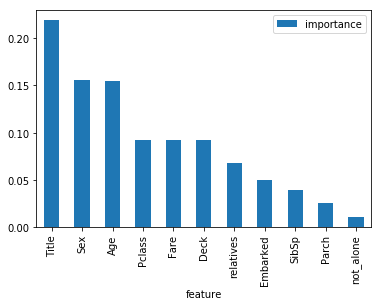

In [90]:
importances.plot.bar()

## not_alone & Parch doesn't play asignificant role let's get rid of it 

In [91]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [92]:
random_forest = RandomForestClassifier()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title
0,0,3,1,2,1,0,0,1,8,1
1,1,1,0,5,1,3,1,1,3,3
2,1,3,0,3,0,0,0,0,8,2
3,1,1,0,5,1,3,0,1,3,3
4,0,3,1,5,0,1,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,1,0,0,8,5
887,1,1,0,2,0,2,0,0,2,2
888,0,3,0,3,1,2,0,3,8,2
889,1,1,1,3,0,2,1,0,3,1


 the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the **out-of-bag samples** to estimate the generalization accuracy.

In [98]:
print("oob score:", round(randomForest.oob_score_, 4)*100, "%")

oob score: 82.04 %


# Hyperparameter Tunning 

In [101]:
#random forest 
random_forest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    oob_score=True,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    random_state=1,
    n_jobs=-1 )
random_forest.fit(x_train,y_train)
y_predict = random_forest.predict(x_test)
print('accuracy: ',round(random_forest.score(x_train,y_train)*100,2),'%')
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

accuracy:  88.55 %
oob score: 83.05 %


# **Submission**

In [102]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('submission.csv', index=False)

In [107]:
pd.read_csv('./submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
